###  Exploratory Data Analysis 

In [1]:
import pandas as pd
from pathlib import Path

DATA_PATH = Path("../data/processed/telco_cleaned.csv")
df = pd.read_csv(DATA_PATH)

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Target Variable Distribution (Churn)

In [2]:
df["Churn"].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [3]:
df["Churn"].value_counts(normalize=True) * 100

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

In [4]:
total_customers = df.shape[0]
churned_customers = df[df["Churn"] == "Yes"].shape[0]

churn_rate = (churned_customers / total_customers) * 100

churn_rate

26.536987079369588

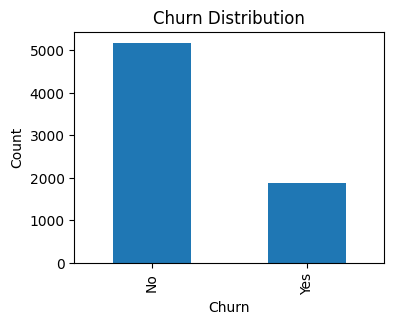

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 3)) 
df["Churn"].value_counts().plot(kind="bar")

plt.title("Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()

### Revenue Impact of Churned Customers

In [6]:
total_monthly_revenue = df["MonthlyCharges"].sum()
total_monthly_revenue

np.float64(456116.6)

In [7]:
churned_monthly_revenue = df[df["Churn"] == "Yes"]["MonthlyCharges"].sum()
churned_monthly_revenue

np.float64(139130.85)

In [8]:
revenue_at_risk_pct = (churned_monthly_revenue / total_monthly_revenue) * 100
revenue_at_risk_pct

np.float64(30.503351555282137)

### Average Monthly Charges: Churn vs Non-Churn

In [9]:
df.groupby("Churn")["MonthlyCharges"].mean()

Churn
No     61.265124
Yes    74.441332
Name: MonthlyCharges, dtype: float64

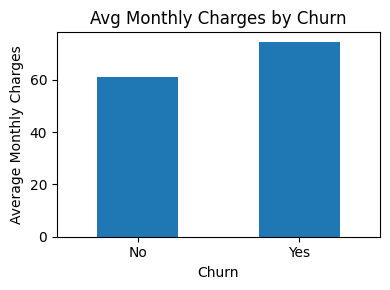

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4,3))

df.groupby("Churn")["MonthlyCharges"].mean().plot(kind="bar")

plt.title("Avg Monthly Charges by Churn")
plt.ylabel("Average Monthly Charges")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Segment-Level Churn Analysis

In [11]:
contract_churn = (
    df.groupby("Contract")["Churn"]
      .value_counts(normalize=True)
      .unstack() * 100
)

contract_churn

Churn,No,Yes
Contract,,
Month-to-month,57.290323,42.709677
One year,88.730482,11.269518
Two year,97.168142,2.831858


### Internet Service vs Churn Rate


In [12]:
internet_churn = pd.crosstab(
    df["InternetService"],
    df["Churn"],
    normalize="index"
) * 100

internet_churn

Churn,No,Yes
InternetService,,
DSL,81.040892,18.959108
Fiber optic,58.107235,41.892765
No,92.595020,7.404980


###  Payment Method vs Churn Rate

In [13]:
payment_churn = pd.crosstab(
    df["PaymentMethod"],
    df["Churn"],
    normalize="index"
) * 100

payment_churn

Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),83.290155,16.709845
Credit card (automatic),84.756899,15.243101
Electronic check,54.714588,45.285412
Mailed check,80.893300,19.106700


### Tenure Bucket vs Churn Rate

In [14]:
df["tenure_group"] = pd.cut(
    df["tenure"],
    bins=[-1, 6, 12, 24, 48, 72],
    labels=["0-6", "6-12", "12-24", "24-48", "48-72"]
)

df["tenure_group"].head()

0      0-6
1    24-48
2      0-6
3    24-48
4      0-6
Name: tenure_group, dtype: category
Categories (5, str): ['0-6' < '6-12' < '12-24' < '24-48' < '48-72']

In [15]:
tenure_churn = pd.crosstab(
    df["tenure_group"],
    df["Churn"],
    normalize="index"
) * 100

tenure_churn

Churn,No,Yes
tenure_group,,
0-6,47.062795,52.937205
6-12,64.113475,35.886525
12-24,71.289062,28.710938
24-48,79.611041,20.388959
48-72,90.486824,9.513176


### Senior Citizen vs Churn

In [16]:
senior_churn = pd.crosstab(
    df["SeniorCitizen"],
    df["Churn"],
    normalize="index"
) * 100

senior_churn

Churn,No,Yes
SeniorCitizen,,
0,76.393832,23.606168
1,58.318739,41.681261


### Segment-wise Revenue Impact 

In [17]:
contract_revenue_total = df.groupby("Contract")["MonthlyCharges"].sum()
contract_revenue_total

Contract
Month-to-month    257294.15
One year           95816.60
Two year          103005.85
Name: MonthlyCharges, dtype: float64

In [18]:
contract_revenue_churn = (
    df[df["Churn"] == "Yes"]
    .groupby("Contract")["MonthlyCharges"]
    .sum()
)

contract_revenue_churn

Contract
Month-to-month    120847.10
One year           14118.45
Two year            4165.30
Name: MonthlyCharges, dtype: float64

In [19]:
contract_revenue_risk_pct = (
    contract_revenue_churn / contract_revenue_total
) * 100

contract_revenue_risk_pct

Contract
Month-to-month    46.968460
One year          14.734868
Two year           4.043751
Name: MonthlyCharges, dtype: float64

### Defining High-Risk Dimensions

In [ ]:
import sys
from pathlib import Path

sys.path.append(str(Path().resolve().parent))

In [22]:
from src.analysis import calculate_churn_rate

calculate_churn_rate(df, "Contract")

Churn,No,Yes
Contract,,
Month-to-month,57.290323,42.709677
One year,88.730482,11.269518
Two year,97.168142,2.831858


### Multi-Dimensional Churn (Contract + Internet Service)

In [23]:
multi_churn = pd.crosstab(
    [df["Contract"], df["InternetService"]],
    df["Churn"],
    normalize="index"
) * 100

multi_churn

Churn                                  No        Yes
Contract       InternetService                      
Month-to-month DSL              67.784137  32.215863
               Fiber optic      45.394737  54.605263
               No               81.106870  18.893130
One year       DSL              90.701754   9.298246
               Fiber optic      80.705009  19.294991
               No               97.527473   2.472527
Two year       DSL              98.089172   1.910828
               Fiber optic      92.773893   7.226107
               No               99.216301   0.783699

###  Extreme Risk Clusters (Churn > 50%)

In [24]:
multi_churn_reset = multi_churn.reset_index()

extreme_risk = multi_churn_reset[multi_churn_reset["Yes"] > 50]

extreme_risk

Churn,Contract,InternetService,No,Yes
1,Month-to-month,Fiber optic,45.394737,54.605263


### Revenue at Risk

In [25]:
extreme_segment = df[
    (df["Contract"] == "Month-to-month") &
    (df["InternetService"] == "Fiber optic")
]

extreme_segment.shape

(2128, 22)

In [26]:
extreme_total_revenue = extreme_segment["MonthlyCharges"].sum()
extreme_total_revenue

np.float64(185181.09999999998)

In [27]:
extreme_churn_revenue = extreme_segment[
    extreme_segment["Churn"] == "Yes"
]["MonthlyCharges"].sum()

extreme_churn_revenue

np.float64(100482.0)

In [28]:
extreme_risk_pct = (extreme_churn_revenue / extreme_total_revenue) * 100
extreme_risk_pct

np.float64(54.261477008182815)